In [66]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

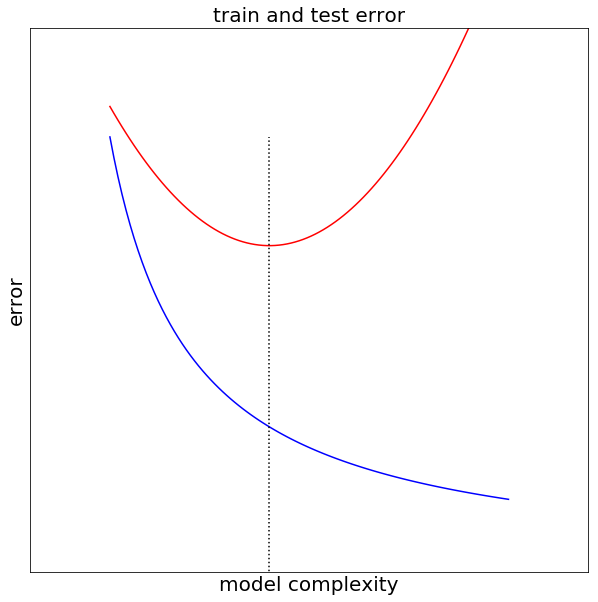

In [70]:
# complexity versus error

fig = plt.figure(figsize = (10,10))

center = 3

x_vertical = np.array([center] * 10)
y_vertical = np.linspace(0,5.5,10)



x = np.linspace(1,6,100)
y_test = (0.4*(x-center))**2 + 5
y_train = 2/(x) + 3.5
test_lim = y_test[0]
# y_test = y_test*(y_test <= test_lim)
plt.plot(x,y_train,'b',x,y_test, 'r',x_vertical, y_vertical, 'k:')
# plt.legend(["train error","test error"],fontsize=20)
plt.xlim(0,7)
plt.ylim(3.5,6)
plt.title("train and test error",fontsize=20)
plt.xlabel("model complexity",fontsize=20)
plt.ylabel("error", fontsize = 20)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    left=False,
    labelleft=False) 

plt.savefig("images/train_versus_test_error")
plt.show()


In [52]:
def rescale_array(y_array,minimum,maximum):
    mi = np.min(y_array)
    ma = np.max(y_array)
    scalefactor = (maximum-minimum)/(ma-mi)
    interm = minimum + y_array * scalefactor
    interm[interm < minimum] = minimum
    return interm

def plot_visual(x_train, y_train, prediction, xlabel=None, ylabel=None,title=None,labelfont = 15, 
                titlefont = 20, minx = 0, miny = 0, maxx = None,maxy = None, size = (10,10),save=None):
    
    plt.figure(figsize=size)
    plt.scatter(x_train, y_train)
    plt.xlabel(xlabel,fontsize = labelfont)
    plt.xlim(minx,maxx)
    plt.ylim(miny,maxy)
    plt.ylabel(ylabel, fontsize = labelfont)    
    plt.title(title, fontsize=titlefont)
    
    if save is not None:
        print("saving to "+save)
        plt.savefig(save+".png")
    
    plt.plot(x_train, prediction, color = 'red')

    if save is not None:
        print("saving to "+save)
        plt.savefig(save+"_regr.png")
    
    plt.show()

In [82]:
def plot_visual_dense(x_train, y_train, prediction, xdense = None, xlabel=None, ylabel=None,title=None,labelfont = 15, 
                titlefont = 20, minx = 0, miny = 0, maxx = None,maxy = None, size = (10,10),save=None):
    
    plt.figure(figsize=size)
    plt.scatter(x_train, y_train)
    plt.xlabel(xlabel,fontsize = labelfont)
    plt.xlim(minx,maxx)
    plt.ylim(miny,maxy)
    plt.ylabel(ylabel, fontsize = labelfont)    
    plt.title(title, fontsize=titlefont)
    
    if save is not None:
        print("saving to "+save)
        plt.savefig(save+".png")
    
    plt.plot(x_dense, prediction, color = 'red')

    if save is not None:
        print("saving to "+save)
        plt.savefig(save+"_regr.png")
    
    plt.show()

saving to images/firstdegree
saving to images/firstdegree


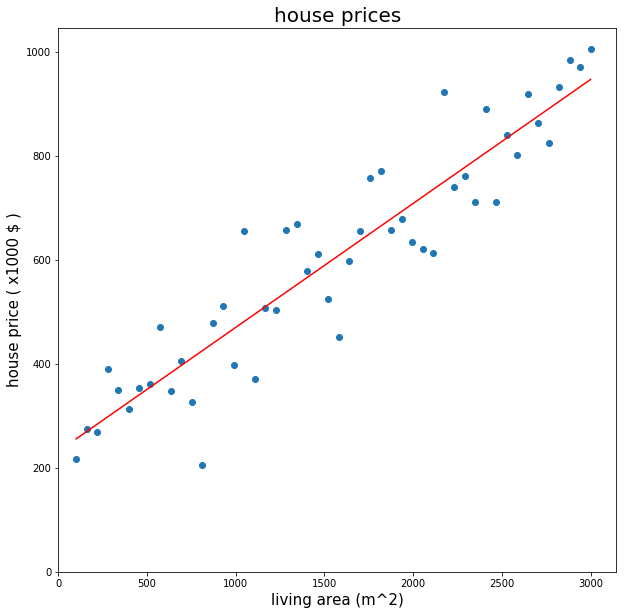

In [52]:
# first degree

x_train = np.linspace(100, 3000, 50)

a = 1
b = 1
bias = 0.2

y_train = a * np.power(x_train, 1) + b * x_train

avg = np.mean(y_train)
y_train += np.random.randn(*x_train.shape) * avg * bias
y_train = rescale_array(y_train, 200,1000)

regression = LinearRegression()
regression.fit(np.expand_dims(x_train,1), y_train)
prediction = regression.predict(np.expand_dims(x_train,1))

plot_visual(x_train, y_train, prediction, save = "images/firstdegree", xlabel = "living area (m^2)", ylabel = "house price ( x1000 $ )", title = "house prices")

saving to images/thirddegree
saving to images/thirddegree


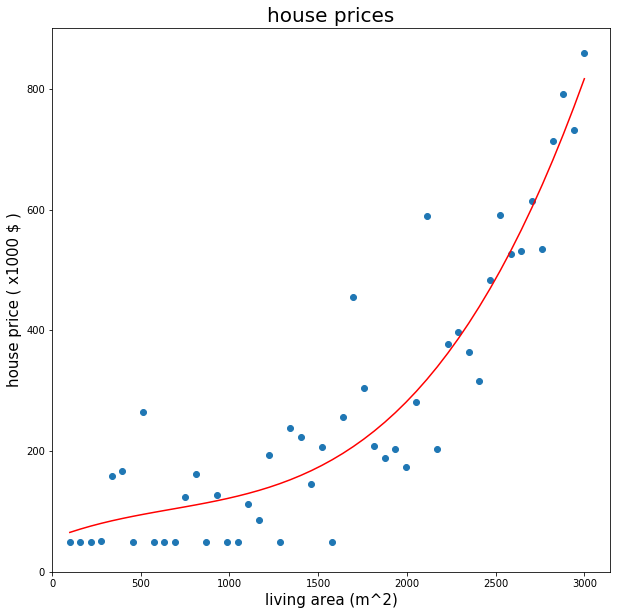

In [7]:
# polynomial

x_train = np.linspace(100, 3000, 50)

y_train = 5 + 1 * np.power(x_train, 1) + 6 * np.power(x_train, 2) + 7 * np.power(x_train, 3)

bias = 0.5

avg = np.mean(y_train)
y_train += np.random.randn(*x_train.shape) * avg * bias
y_train = rescale_array(y_train, 50,1000)

poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train.reshape(-1,1))

regression = LinearRegression()
regression.fit(x_train_poly, y_train)
prediction = regression.predict(x_train_poly)

plot_visual(x_train, y_train, prediction, save = "images/thirddegree", xlabel = "living area (m^2)", 
            ylabel = "house price ( x1000 $ )", title = "house prices")

saving to images/underfit
saving to images/underfit


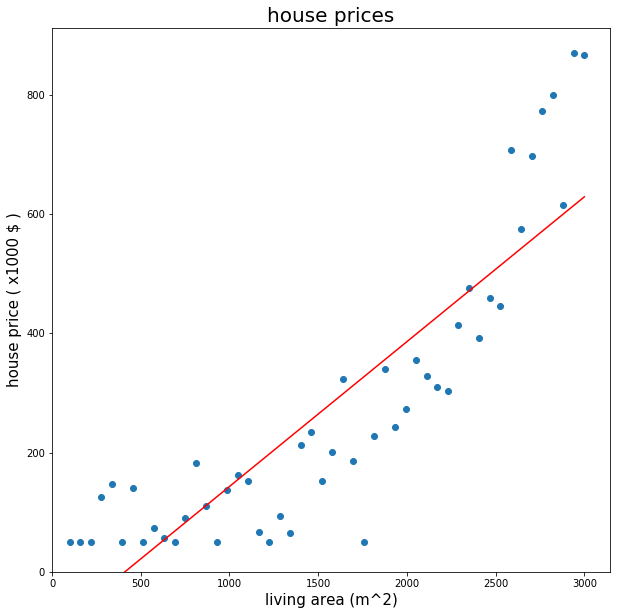

In [14]:
# underfitting

x_train = np.linspace(100, 3000, 50)

y_train = 5 + 1 * np.power(x_train, 1) + 6 * np.power(x_train, 2) + 7 * np.power(x_train, 3)

bias = 0.3

avg = np.mean(y_train)
y_train += np.random.randn(*x_train.shape) * avg * bias
y_train = rescale_array(y_train, 50,1000)

poly_features = PolynomialFeatures(degree=1, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train.reshape(-1,1))

regression = LinearRegression()
regression.fit(x_train_poly, y_train)
prediction = regression.predict(x_train_poly)

plot_visual(x_train, y_train, prediction, save = "images/underfit", xlabel = "living area (m^2)", 
            ylabel = "house price ( x1000 $ )", title = "house prices")

In [199]:
regression.coef_

array([-1.47806969e+05,  3.16439392e+02, -3.59053194e-01,  2.27749760e-04,
       -7.65776043e-08,  1.06640349e-11])

In [201]:
regression.intercept_

28584798.933559448

In [200]:
regression_wide.coef_

array([-1.40889591e+00,  2.33655746e-03, -1.20032873e-06,  5.99616802e-11,
        1.09901087e-13, -2.13524086e-17])

(2800,)
(7,)
(56,)


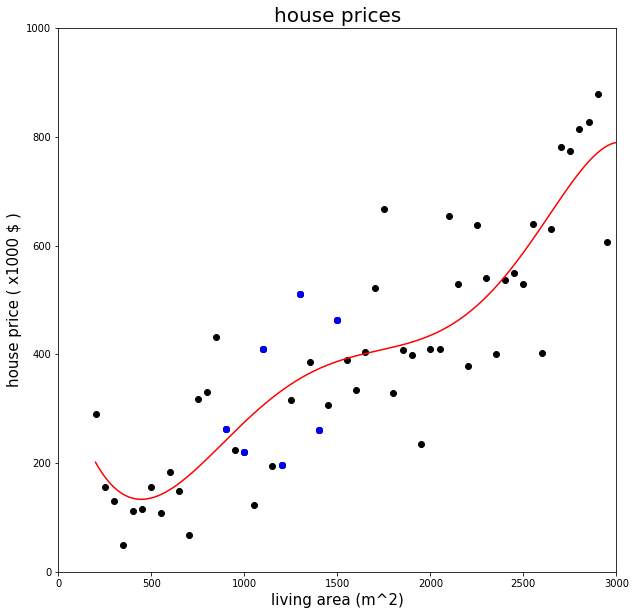

In [224]:
# overfitting: model complexity

np.random.seed(3)


# full range
x_dense = np.linspace(200,3000,2800)


# simulate m training samples

x_train_wide = x_dense[0:2800:50]
x_train = x_train_wide[14:28:2]


bias = 0.3

# y_train = 4 + 3*x_train
# avg = np.mean(y_train)
# y_train += np.random.randn(*x_train.shape) * avg * bias
# y_train = rescale_array(y_train, 50,1000)

y_train_wide = 4 + 3*x_train_wide
avg_wide = np.mean(y_train_wide)
y_train_wide += np.random.randn(*x_train_wide.shape) * avg_wide * bias
y_train_wide = rescale_array(y_train_wide, 50,1000)

y_train = y_train_wide[14:28:2]

print(x_dense.shape)
print(x_train.shape)
print(x_train_wide.shape)

# fit a regression model
poly_features = PolynomialFeatures(degree=6, include_bias=False)

x_train_poly = poly_features.fit_transform(x_train.reshape(-1,1))
regression = LinearRegression(normalize=True)
regression.fit(x_train_poly, y_train)

x_train_poly_wide = poly_features.fit_transform(x_train_wide.reshape(-1,1))
regression_wide = LinearRegression(normalize=True)
regression_wide.fit(x_train_poly_wide, y_train_wide)

# predict dense
x_dense_poly = poly_features.fit_transform(x_dense.reshape(-1,1))
prediction_dense = regression.predict(x_dense_poly)

prediction_dense_wide = regression_wide.predict(x_dense_poly)

plot_visual_dual(x_train, y_train, x_dense, prediction_dense, x_train_wide=x_train_wide, y_train_wide=y_train_wide, 
                 prediction_dense_wide=prediction_dense_wide, xlabel = "living area (m^2)", 
            ylabel = "house price ( x1000 $ )", title = "house prices",maxx=3000,maxy=1000,save="images/overfit/overfit")

[ 900.25008932 1000.28581636 1100.32154341 1200.35727045 1300.3929975
 1400.42872454 1500.46445159]
[909.45415976 670.95818032 650.3804293  281.00264549 675.14022982
 711.11226689 822.31165734]
[ 900.25008932 1000.28581636 1100.32154341 1200.35727045 1300.3929975
 1400.42872454 1500.46445159 2500.        ]
[ 909.45415976  670.95818032  650.3804293   281.00264549  675.14022982
  711.11226689  822.31165734 1231.00264549]
(7, 6)
(7,)


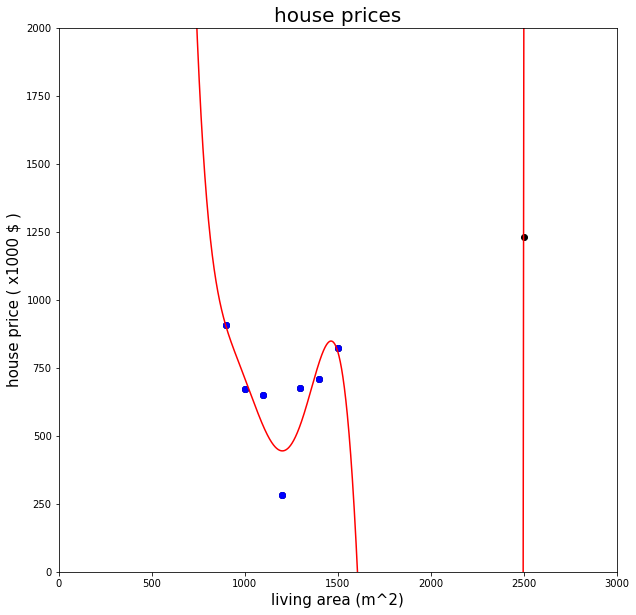

In [226]:
# overfitting: small variation in training data

np.random.seed(3)


# full range
x_dense = np.linspace(200,3000,2800)


# simulate m training samples

x_train_wide = x_dense[0:2800:50]
x_train = x_train_wide[14:28:2]
x_train_wide = np.append(x_train, 2500)



bias = 0.3

# y_train = 4 + 3*x_train
# avg = np.mean(y_train)
# y_train += np.random.randn(*x_train.shape) * avg * bias
# y_train = rescale_array(y_train, 50,1000)

y_train_wide = 4 + 3*x_train_wide
avg_wide = np.mean(y_train_wide)
y_train_wide += np.random.randn(*x_train_wide.shape) * avg_wide * bias
y_train_wide = rescale_array(y_train_wide, 50,1000)

y_train = y_train_wide[0:len(y_train_wide)-1]

print(x_train)
print(y_train)
print(x_train_wide)
print(y_train_wide)


# fit a regression model
poly_features = PolynomialFeatures(degree=6, include_bias=False)

x_train_poly = poly_features.fit_transform(x_train.reshape(-1,1))
print(x_train_poly.shape)
print(y_train.shape)
regression = LinearRegression(normalize=True)
regression.fit(x_train_poly, y_train)

x_train_poly_wide = poly_features.fit_transform(x_train_wide.reshape(-1,1))
regression_wide = LinearRegression(normalize=True)
regression_wide.fit(x_train_poly_wide, y_train_wide)

# predict dense
x_dense_poly = poly_features.fit_transform(x_dense.reshape(-1,1))
prediction_dense = regression.predict(x_dense_poly)

prediction_dense_wide = regression_wide.predict(x_dense_poly)

plot_visual_dual(x_train, y_train, x_dense, prediction_dense, x_train_wide=x_train_wide, y_train_wide=y_train_wide, 
                 prediction_dense_wide=prediction_dense_wide, xlabel = "living area (m^2)", 
            ylabel = "house price ( x1000 $ )", title = "house prices",maxx=3000,maxy=2000,save="images/overfit/overfit_trainsetvariation")

In [211]:
def plot_visual_dual(x_train, y_train, x_dense, prediction_dense, xlabel=None, ylabel=None,title=None,labelfont = 15, 
                titlefont = 20, minx = 0, miny = 0, size = (10,10),save=None,x_train_wide=None, y_train_wide=None,prediction_dense_wide=None,
                    maxx=None, maxy=None):
    
    plt.figure(figsize=size)
       
    plt.xlabel(xlabel,fontsize = labelfont)
    plt.xlim(minx,maxx)
    plt.ylim(miny,maxy)
    plt.ylabel(ylabel, fontsize = labelfont)    
    plt.title(title, fontsize=titlefont)
        
    
    plt.scatter(x_train, y_train,color='blue')
    if save is not None:
        plt.savefig(save+"_bluedots.png")
    l = plt.plot(x_dense, prediction_dense, color = 'red')
    if save is not None:
        plt.savefig(save+"_bluedots_regr.png")
        

    plt.scatter(x_train_wide, y_train_wide,color='black')
    plt.scatter(x_train, y_train,color='blue')
    if save is not None:
        plt.savefig(save+"_alldots_blueregr.png")
    l[0].remove()
    ll = plt.plot(x_dense, prediction_dense_wide, color = 'red')
    if save is not None:
        plt.savefig(save+"_alldots_regr.png")

    
    plt.show() 

(11,)


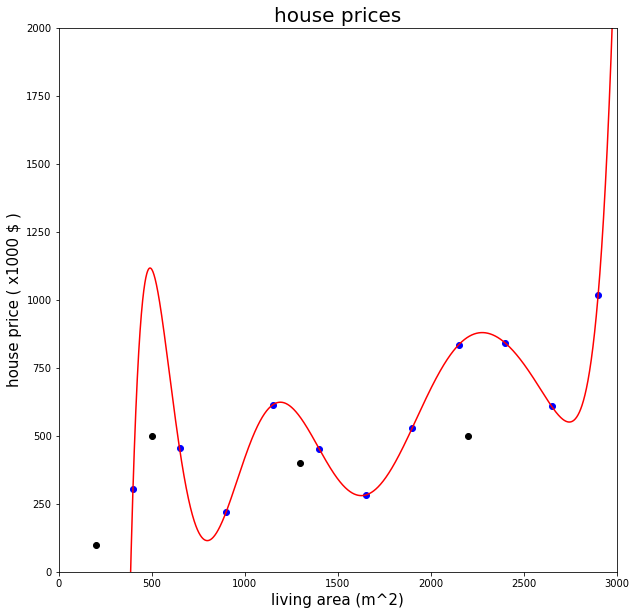

In [64]:
#variance: noise

np.random.seed(4)
x_dense = np.linspace(200,3000,2800)
x_train = x_dense[200:2800:250] #shape 10
print(x_train.shape)

x_hack = np.array([200,500,1300,2200])
y_hack = np.array([100,500,400,500])

y_train = 2 * np.power(x_train, 1) + 3 

#in powerpoint: bias = 0.5 and 0.8
bias = 0.5 


avg = np.mean(y_train)
y_train += np.random.randn(*x_train.shape) * avg * bias
y_train = rescale_array(y_train, 200,1000)


# fit a regression model
poly_features = PolynomialFeatures(degree=10, include_bias=False)

x_train_poly = poly_features.fit_transform(x_train.reshape(-1,1))

regression = LinearRegression(normalize=True)
regression.fit(x_train_poly, y_train)



# predict dense
x_dense_poly = poly_features.fit_transform(x_dense.reshape(-1,1))
prediction_dense = regression.predict(x_dense_poly)


plot_visual_noise(x_train, y_train, x_dense, prediction_dense,
                 xlabel = "living area (m^2)", x_hack = x_hack, y_hack = y_hack,
                ylabel = "house price ( x1000 $ )", title = "house prices",maxx=3000,maxy=2000, save="images/overfit/noise_variance_hack")

(11,)


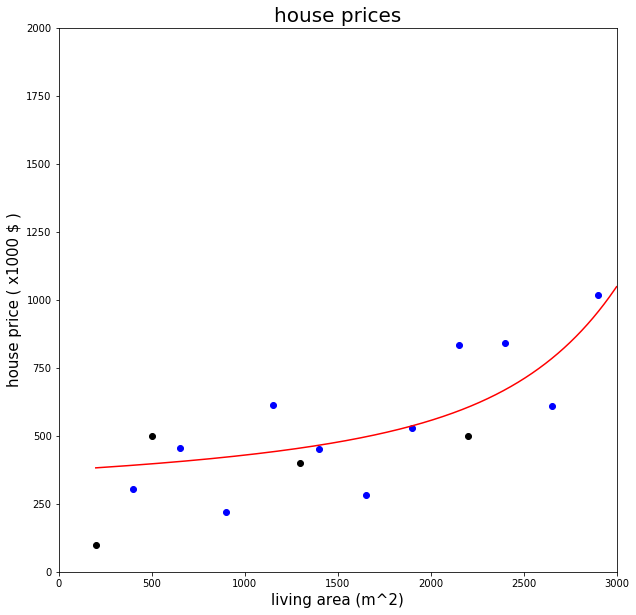

In [69]:
#ridge regression (builds on example in previous cell - variance: noise)

np.random.seed(4)
x_dense = np.linspace(200,3000,2800)
x_train = x_dense[200:2800:250] #shape 10
print(x_train.shape)

x_hack = np.array([200,500,1300,2200])
y_hack = np.array([100,500,400,500])

y_train = 2 * np.power(x_train, 1) + 3 


bias = 0.5 


avg = np.mean(y_train)
y_train += np.random.randn(*x_train.shape) * avg * bias
y_train = rescale_array(y_train, 200,1000)


# fit a regression model
poly_features = PolynomialFeatures(degree=10, include_bias=False)

x_train_poly = poly_features.fit_transform(x_train.reshape(-1,1))

#SWITCH REGULARIZATION ON/OFF (ALSO CHANGE FILE NAME BELOW)
# regression = LinearRegression(normalize=True)
regression = RidgeCV(normalize=True)
regression.fit(x_train_poly, y_train)



# predict dense
x_dense_poly = poly_features.fit_transform(x_dense.reshape(-1,1))
prediction_dense = regression.predict(x_dense_poly)


plot_visual_noise(x_train, y_train, x_dense, prediction_dense,
                 xlabel = "living area (m^2)", x_hack = x_hack, y_hack = y_hack,
                ylabel = "house price ( x1000 $ )", title = "house prices",maxx=3000,maxy=2000, save="images/regularization/with_regularization")

In [62]:
def plot_visual_noise(x_train, y_train, x_dense, prediction_dense, 
                    xlabel=None, ylabel=None,title=None,labelfont = 15, 
                    titlefont = 20, minx = 0, miny = 0, size = (10,10),save=None,
                    maxx=None, maxy=None,x_hack=None, y_hack=None):
    
    plt.figure(figsize=size)

    if x_hack is not None:
        plt.scatter(x_hack, y_hack,color='black')
    
    plt.xlabel(xlabel,fontsize = labelfont)
    plt.xlim(minx,maxx)
    plt.ylim(miny,maxy)
    plt.ylabel(ylabel, fontsize = labelfont)    
    plt.title(title, fontsize=titlefont)
        
    
    plt.scatter(x_train, y_train, color="blue")
    plt.plot(x_dense, prediction_dense, color="red")

    plt.savefig(save+".png")
    
    plt.show()

In [53]:
# overfitting due to not enough data

np.random.seed(0)

x_prediction = np.linspace(100, 5000, 50)
x_train = x_prediction[20:35:2]

y_all = 5 + 1 * np.power(x_prediction, 1)
y_all += np.random.randn(*x_prediction.shape) * avg * bias
y_all = rescale_array(y_all, 50,1000)


y_train = y_all[20:35:2]

bias = 0.4

avg = np.mean(y_train)


poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train.reshape(-1,1))
x_prediction_poly = poly_features.fit_transform(x_prediction.reshape(-1,1))

regression = LinearRegression()
regression.fit(x_train_poly, y_train)
prediction = regression.predict(x_prediction_poly)

plot_visual_dual(x_train, y_train, x_prediction, y_all, prediction, save = "images/overfit_alldots", xlabel = "living area (m^2)", 
            ylabel = "house price ( x1000 $ )", title = "house prices")

NameError: name 'plot_visual_dual' is not defined

In [61]:
# variance and overfitting: small variation in noise (run twice with different seed)

np.random.seed(3)

x_dense = np.linspace(200,3000,2800)


# simulate m training samples
x_train_wide = x_dense[0:2800:50]
x_train = x_train_wide




bias = 0.3

y_train = 4 + 3*x_train
avg = np.mean(y_train)
y_train += np.random.randn(*x_train.shape) * avg * bias
y_train = rescale_array(y_train, 50,1000)

# y_train_wide = 4 + 3*x_train_wide
# avg_wide = np.mean(y_train_wide)
# y_train_wide += np.random.randn(*x_train_wide.shape) * avg_wide * bias
# y_train_wide = rescale_array(y_train_wide, 50,1000)

# y_train = y_train_wide[0:len(y_train_wide)-1]

# fit a regression model
poly_features = PolynomialFeatures(degree=6, include_bias=False)

x_train_poly = poly_features.fit_transform(x_train.reshape(-1,1))
print(x_train_poly.shape)
print(y_train.shape)
regression = LinearRegression(normalize=True)
regression.fit(x_train_poly, y_train)

x_train_poly_wide = poly_features.fit_transform(x_train_wide.reshape(-1,1))
regression_wide = LinearRegression(normalize=True)
regression_wide.fit(x_train_poly_wide, y_train_wide)

# predict dense
x_dense_poly = poly_features.fit_transform(x_dense.reshape(-1,1))
prediction_dense = regression.predict(x_dense_poly)

prediction_dense_wide = regression_wide.predict(x_dense_poly)

plot_visual_dual(x_train, y_train, x_dense, prediction_dense, x_train_wide=x_train_wide, y_train_wide=y_train_wide, 
                 prediction_dense_wide=prediction_dense_wide, xlabel = "living area (m^2)", 
            ylabel = "house price ( x1000 $ )", title = "house prices",maxx=3000,maxy=2000,save="images/overfit/overfit_noisevariance")

(56, 6)
(56,)


NameError: name 'plot_visual_dual' is not defined